# Naive Bayes Classifier

By Rama Vempati

To connect with or follow me on LinkedIn [Click Here](https://www.linkedin.com/in/ramavempati/)

### Introduction

* Naive Bayes models are a group of extremely fast and simple classification algorithms that are often suitable for very high-dimensional datasets.


* Because they are so fast and have so few tunable parameters, they end up being very useful as a quick-and-dirty baseline for a classification problem.

### Bayesian Classification

Naive Bayes classifiers are built on Bayesian classification methods.
These rely on Bayes's theorem, which is an equation describing the relationship of conditional probabilities of statistical quantities.
In Bayesian classification, we're interested in finding the probability of a label given some observed features, which we can write as $P(L~|~{\rm features})$.
Bayes's theorem tells us how to express this in terms of quantities we can compute more directly:

$$
P(L~|~{\rm features}) = \frac{P({\rm features}~|~L)P(L)}{P({\rm features})}
$$


If we are trying to decide between two labels—let's call them $L_1$ and $L_2$—then one way to make this decision is to compute the ratio of the posterior probabilities for each label:

$$
\frac{P(L_1~|~{\rm features})}{P(L_2~|~{\rm features})} = \frac{P({\rm features}~|~L_1)}{P({\rm features}~|~L_2)}\frac{P(L_1)}{P(L_2)}
$$


All we need now is some model by which we can compute $P({\rm features}~|~L_i)$ for each label.
Such a model is called a *generative model* because it specifies the hypothetical random process that generates the data.
Specifying this generative model for each label is the main piece of the training of such a Bayesian classifier.
The general version of such a training step is a very difficult task, but we can make it simpler through the use of some simplifying assumptions about the form of this model.

This is where the "naive" in "naive Bayes" comes in: if we make very naive assumptions about the generative model for each label, we can find a rough approximation of the generative model for each class, and then proceed with the Bayesian classification.

### Example 1 - Naive Bayes Classification on MNIST dataset

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; 

sns.set()

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [6]:
# Fetch the MNIST handwritten digit dataset
from sklearn.datasets import fetch_mldata
mnist = fetch_mldata('MNIST original', data_home="data")

Populating the interactive namespace from numpy and matplotlib


/Users/ramakrishnavempati/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function fetch_mldata is deprecated; fetch_mldata was deprecated in version 0.20 and will be removed in version 0.22
  warnings.warn(msg, category=DeprecationWarning)
/Users/ramakrishnavempati/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function mldata_filename is deprecated; mldata_filename was deprecated in version 0.20 and will be removed in version 0.22
  warnings.warn(msg, category=DeprecationWarning)


In [7]:
# Display the number of samples 
mnist.data.shape

(70000, 784)

Populating the interactive namespace from numpy and matplotlib


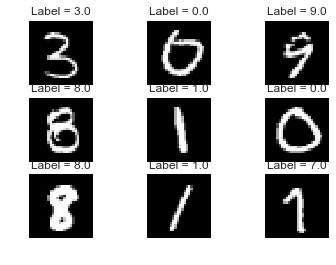

In [9]:
%pylab inline

# Display 9 number randomly selectly
for c in range(1, 10):
    subplot(3, 3,c)
    i = randint(mnist.data.shape[0])
    im = mnist.data[i].reshape((28,28))
    axis("off")
    title("Label = {}".format(mnist.target[i]))
    imshow(im, cmap='gray')

In [10]:
# Split the data into training and test data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(mnist.data, mnist.target, test_size=0.05, random_state=42)

In [11]:
# Create the Multinomial Naive Bayes Classifier
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()

In [12]:
# Perform the predictions
clf.fit(x_train, y_train)

# Perform the predictions
y_predicted = clf.predict(x_test)

# Calculate the accuracy of the prediction
from sklearn.metrics import accuracy_score
print("Accuracy = ")
print(format(accuracy_score(y_test, y_predicted)*100))

Accuracy = 
81.71428571428572


In [13]:
# Cross validate the scores
from sklearn.metrics import classification_report
print("Classification Report")
print(format(classification_report(y_test, y_predicted, labels=range(0,10))))

Classification Report
              precision    recall  f1-score   support

           0       0.91      0.89      0.90       320
           1       0.85      0.95      0.90       387
           2       0.89      0.84      0.87       352
           3       0.78      0.81      0.80       356
           4       0.83      0.73      0.78       329
           5       0.85      0.67      0.75       342
           6       0.90      0.91      0.91       377
           7       0.94      0.82      0.87       360
           8       0.63      0.72      0.67       337
           9       0.66      0.80      0.72       340

   micro avg       0.82      0.82      0.82      3500
   macro avg       0.82      0.81      0.82      3500
weighted avg       0.83      0.82      0.82      3500



### Understanding of above metrics


True positive and true negatives are the observations that are correctly predicted and therefore shown in green. We want to minimize false positives and false negatives so they are shown in red color.

<img src='images/accuracy-table.png' alt='accuracy-table' style="width: 500px;"/>



**True Positives (TP)** - These are the correctly predicted positive values which means that the value of actual class is yes and the value of predicted class is also yes.

**True Negatives (TN)** - These are the correctly predicted negative values which means that the value of actual class is no and value of predicted class is also no.

False positives and false negatives, these values occur when your actual class contradicts with the predicted class.

**False Positives (FP)** – When actual class is no and predicted class is yes.

**False Negatives (FN)** – When actual class is yes but predicted class in no.

**Accuracy** - Accuracy is the most intuitive performance measure and it is simply a ratio of correctly predicted observation to the total observations. One may think that, if we have high accuracy then our model is best. Yes, accuracy is a great measure but only when you have symmetric datasets where values of false positive and false negatives are almost same. Therefore, you have to look at other parameters to evaluate the performance of your model. For our model, approx. 81% accurate.

Accuracy = TP+TN/TP+FP+FN+TN

**Precision** - Precision is the ratio of correctly predicted positive observations to the total predicted positive observations. High precision relates to the low false positive rate. 

Precision = TP/TP+FP

**Recall (Sensitivity)** - Recall is the ratio of correctly predicted positive observations to the all observations in actual class - yes. 

Recall = TP/TP+FN

**F1 score** - F1 Score is the weighted average of Precision and Recall. Therefore, this score takes both false positives and false negatives into account. Intuitively it is not as easy to understand as accuracy, but F1 is usually more useful than accuracy, especially if you have an uneven class distribution. Accuracy works best if false positives and false negatives have similar cost. If the cost of false positives and false negatives are very different, it’s better to look at both Precision and Recall. 

F1 Score = 2*(Recall * Precision) / (Recall + Precision)

**Support** - Support is the number of actual occurrences of the class in the specified dataset.


**Micro-averaged Precision** is calculated as precision of Total values:

$$
\text{Micro-averaged Precision} = \frac{TP_{total}}{TP_{total} + FP_{total}} 
$$

**Macro-averaged Precision** is calculated as an average of Precisions of all classes

**Weighted-averaged Precision** is also calculated based on Precision per class but takes into account the number of samples of each class in the data

### Example 2 - Naive Bayes Classification on Text

In [14]:
from sklearn.datasets import fetch_20newsgroups

data = fetch_20newsgroups()
data.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [15]:
train = fetch_20newsgroups(subset='train')
test = fetch_20newsgroups(subset='test')

In [16]:
print(train.data[12])

From: rodc@fc.hp.com (Rod Cerkoney)
Subject: *$G4qxF,fekVH6
Nntp-Posting-Host: hpfcmrc.fc.hp.com
Organization: Hewlett Packard, Fort Collins, CO
X-Newsreader: TIN [version 1.1 PL8.5]
Lines: 15



--


Regards,
Rod Cerkoney
                                                        /\
______________________________________________         /~~\
                                                      /    \
  Rod Cerkoney MS 37     email:                      /      \ 
  Hewlett Packard         rodc@fc.hp.com        /\  /        \  
  3404 East Harmony Rd.  Hpdesk:               /  \/          \    /\
  Fort Collins, CO 80525  HP4000/UX           /    \           \  /  \
_____________________________________________/      \           \/    \__



In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

model = make_pipeline(TfidfVectorizer(), MultinomialNB())

In [18]:
model.fit(train.data, train.target)
labels = model.predict(test.data)

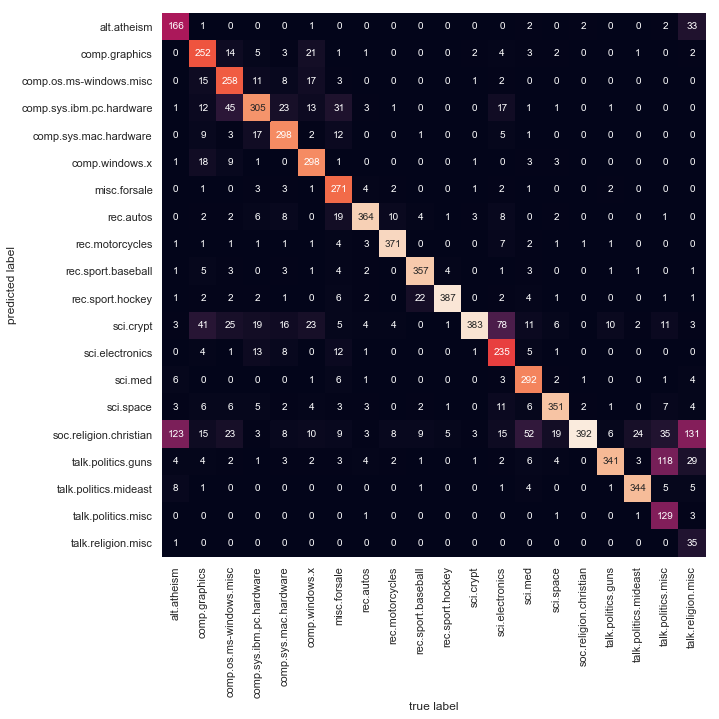

In [19]:
from sklearn.metrics import confusion_matrix
fig, ax = plt.subplots(figsize=(10,10))
mat = confusion_matrix(test.target, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=train.target_names, yticklabels=train.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

In [20]:
def predict_category(s, train=train, model=model):
    pred = model.predict([s])
    return train.target_names[pred[0]]

In [21]:
predict_category('sending a payload to the ISS')

'sci.space'

In [22]:
predict_category('discussing islam vs atheism')

'alt.atheism'

In [23]:
predict_category('determining the screen resolution')

'comp.graphics'

### Example 3 - Naive Bayes on Breast Cancer Data

In [24]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

In [25]:
cancer.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [26]:
cancer['data'].shape

(569, 30)

In [27]:
X = cancer['data']
y = cancer['target']

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [29]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [30]:
# Now apply the transformations to the data:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

#### Gaussian Naive Bayes

In [32]:
from sklearn.naive_bayes import GaussianNB

### Gaussian Naive Bayes
clf = GaussianNB()

clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.9230769230769231

#### Bernoulli Naive Bayes

In [35]:
from sklearn.naive_bayes import BernoulliNB

### Bernoulli NB
clf_mn = BernoulliNB()

clf_mn.fit(X_train, y_train)
clf_mn.score(X_test, y_test)

0.965034965034965

### Conclusions

### Advatages:

* It is easy and fast to predict class of test data set. It also perform well in multi class prediction


* When assumption of independence holds, a Naive Bayes classifier performs better compare to other models like logistic regression and you need less training data.


* It perform well in case of categorical input variables compared to numerical variable(s). For numerical variable, normal distribution is assumed.


### Disadvantages:

* If categorical variable has a category (in test data set), which was not observed in training data set, then model will assign a 0 (zero) probability and will be unable to make a prediction. This is often known as “Zero Frequency”. To solve this, we can use the smoothing technique. One of the simplest smoothing techniques is called Laplace estimation.


* Another limitation of Naive Bayes is the assumption of independent predictors. In real life, it is almost impossible that we get a set of predictors which are completely independent.